#### Import Libraries

In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

#### Load the dataset

In [8]:
# the data is split between the train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


The dataset must be reshaped to be used by the cnn model

In [9]:
batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


#### Standardize the dataset

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [11]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Convert the output to a binary class vector

In [13]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#### Create the CNN model

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#### Compile the model

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

#### Fit the model to the dataset

This will give us the accuracy of the model

In [6]:
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1200s 20ms/step - loss: 0.3180 - acc: 0.9017 - val_loss: 0.0695 - val_acc: 0.9793
Epoch 2/10
60000/60000 [==============================] - 2648s 44ms/step - loss: 0.1009 - acc: 0.9702 - val_loss: 0.0497 - val_acc: 0.9834
Epoch 3/10
60000/60000 [==============================] - 2704s 45ms/step - loss: 0.0774 - acc: 0.9770 - val_loss: 0.0376 - val_acc: 0.9877
Epoch 4/10
60000/60000 [==============================] - 1605s 27ms/step - loss: 0.0633 - acc: 0.9815 - val_loss: 0.0362 - val_acc: 0.9882
Epoch 5/10
60000/60000 [==============================] - 2143s 36ms/step - loss: 0.0549 - acc: 0.9834 - val_loss: 0.0352 - val_acc: 0.9884
Epoch 6/10
60000/60000 [==============================] - 32390s 540ms/step - loss: 0.0496 - acc: 0.9852 - val_loss: 0.0354 - val_acc: 0.9891
Epoch 7/10
60000/60000 [===========

Accury of the above model = 0.9905

#### Plotting the images

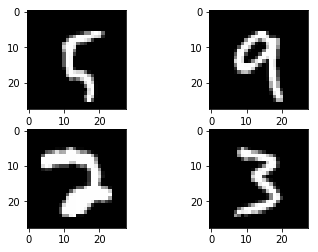

In [20]:
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.subplot(221)
plt.imshow(x_train[100], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[110], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[120], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[130], cmap=plt.get_cmap('gray'))
plt.show()